In [1]:
#import libraries
import numpy as np
import pandas as pd
import datetime
import seaborn as sb
import matplotlib.pyplot as plt

# Importing Data

In [2]:
steam_data = pd.read_csv('AllSteamData.csv')
steam_data.head()

,Name,Month,Avg. Players,Gain,% Gain,Peak Players
0,Counter-Strike,Last 30 Days,8488.74,27.6,0.33%,15065
1,Counter-Strike,Sep-21,8461.12,-390.07,-4.41%,14559
2,Counter-Strike,Aug-21,8851.19,-286.57,-3.14%,14064
3,Counter-Strike,Jul-21,9137.76,-359.69,-3.79%,14972
4,Counter-Strike,Jun-21,9497.45,-1243.5,-11.58%,16391


In [3]:
steam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878175 entries, 0 to 878174
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Name          878175 non-null  object 
 1   Month         878175 non-null  object 
 2   Avg. Players  878175 non-null  float64
 3   Gain          867341 non-null  object 
 4   % Gain        867341 non-null  object 
 5   Peak Players  878175 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 40.2+ MB


# Cleaning Dataset

In [4]:
steam_data_clean=steam_data.copy()
steam_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878175 entries, 0 to 878174
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Name          878175 non-null  object 
 1   Month         878175 non-null  object 
 2   Avg. Players  878175 non-null  float64
 3   Gain          867341 non-null  object 
 4   % Gain        867341 non-null  object 
 5   Peak Players  878175 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 40.2+ MB


In [5]:
#Drop Duplicates
steam_data_clean.drop_duplicates()

#cleaning the % Gain column
steam_data_clean['% Gain'] = steam_data_clean['% Gain'].str.replace("%","")

#filling the NULL values in Gain and % Gain to 0
steam_data_clean.Gain[steam_data_clean.Gain == '-'] = 0
steam_data_clean['% Gain'][steam_data_clean['% Gain'] == 'NaN'] = 0
steam_data_clean['% Gain'][steam_data_clean['% Gain'] == '-'] = 0
steam_data_clean.fillna(value = 0, inplace = True)

#cleaning the Month column
steam_data_clean['Month'] = steam_data_clean['Month'].str.replace("Last 30 Days","Oct-21")
steam_data_clean['Month'] = pd.to_datetime(steam_data_clean['Month'], format='%b-%y')

steam_data_clean

C:\Users\choww\AppData\Local\Temp/ipykernel_13100/1104227979.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steam_data_clean.Gain[steam_data_clean.Gain == '-'] = 0
C:\Users\choww\AppData\Local\Temp/ipykernel_13100/1104227979.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steam_data_clean['% Gain'][steam_data_clean['% Gain'] == 'NaN'] = 0
C:\Users\choww\AppData\Local\Temp/ipykernel_13100/1104227979.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

,Name,Month,Avg. Players,Gain,% Gain,Peak Players
0,Counter-Strike,2021-10-01,8488.74,27.6,0.33,15065
1,Counter-Strike,2021-09-01,8461.12,-390.07,-4.41,14559
2,Counter-Strike,2021-08-01,8851.19,-286.57,-3.14,14064
3,Counter-Strike,2021-07-01,9137.76,-359.69,-3.79,14972
4,Counter-Strike,2021-06-01,9497.45,-1243.5,-11.58,16391
...,...,...,...,...,...,...
878170,Ultra Age Demo,2021-10-01,5.45,0,0,35
878171,Grim Tales: Crimson Hollow Collector's Edition,2021-10-01,2.40,0,0,9
878172,Everyday Life in Hospital VR,2021-10-01,0.00,0,0,0
878173,Martha Is Dead Demo,2021-10-01,9.03,0,0,41


In [6]:
steam_data_clean.sample(20)

,Name,Month,Avg. Players,Gain,% Gain,Peak Players
621162,Zombie Ballz,2018-06-01,1.49,1.04,230.91,36
243813,Estranged: Act I,2020-09-01,5.92,-1,-14.42,21
637720,VoiceWarrior,2019-05-01,3.84,-0.37,-8.76,8
572744,Handball 17,2018-12-01,0.78,0.12,18.78,7
288661,Nobunaga's Ambition: Souzou,2019-07-01,53.94,-3.6,-6.26,123
236624,Elder Sign: Omens,2018-09-01,2.51,-3.76,-59.95,11
453393,Poker Pretty Girls Battle: Texas Hold'em,2019-12-01,0.46,0.03,6.76,3
2657,Spacewar,2014-05-01,656.90,-54.48,-7.66,1309
414899,Rack N Ruin,2016-11-01,0.41,0.16,61.93,4
341906,Rugby Union Team Manager 2015,2016-08-01,4.70,0.22,4.92,17


In [7]:
steam_data_clean.describe()

,Avg. Players,Peak Players
count,8.781750e+05,8.781750e+05
mean,3.298315e+02,6.828038e+02
std,8.601823e+03,1.623968e+04
min,0.000000e+00,0.000000e+00
25%,3.900000e-01,3.000000e+00
50%,2.520000e+00,1.100000e+01
75%,1.752000e+01,5.700000e+01
max,1.584887e+06,3.236027e+06


# Exploring the Dataset

In [8]:
#Top 20 Games by Avg Players for all time
Top_20_alltime = steam_data_clean.sort_values('Avg. Players', ascending=False)

#Only keep the Highest occurence
Top_20_alltime = Top_20_alltime.drop_duplicates(subset=['Name'], keep='first').head(20)
Top_20_alltime

,Name,Month,Avg. Players,Gain,% Gain,Peak Players
618079,PUBG: BATTLEGROUNDS,2018-01-01,1584886.77,148728.26,10.36,3236027
3364,Counter-Strike: Global Offensive,2020-04-01,857604.22,186570.94,27.80,1305714
3078,Dota 2,2016-02-01,709178.26,97003.48,15.85,1248394
817899,New World,2021-10-01,461109.04,0,0,913027
824204,Cyberpunk 2077,2020-12-01,332395.65,0,0,830387
413277,Fallout 4,2015-11-01,226297.83,0,0,471955
771929,Valheim,2021-02-01,210302.24,0,0,498478
258827,Grand Theft Auto V,2015-04-01,192714.01,0,0,360761
621248,Monster Hunter: World,2018-08-01,188291.24,0,0,329333
787669,Among Us,2020-10-01,176453.91,25073.63,16.56,372646


<AxesSubplot:xlabel='Avg. Players', ylabel='Name'>

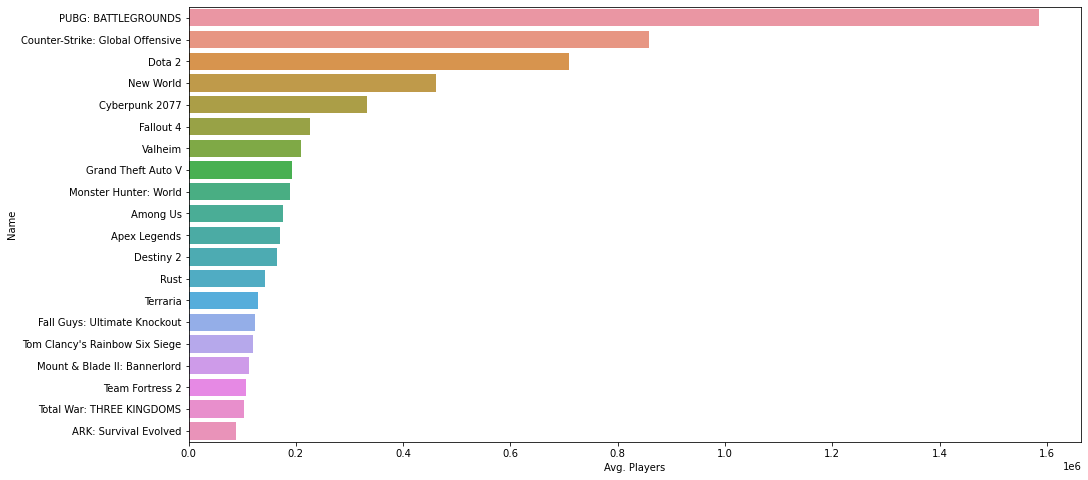

In [9]:
#Exploring data range for Avg. Players
avg = pd.DataFrame(Top_20_alltime[["Avg. Players", "Name"]])

#Using Bar graph
f = plt.figure(figsize=(16, 8))
sb.barplot(x="Avg. Players", y="Name", data=avg)

It can be seen that there is a huge disparity between the number of average players for the top 20 games of all time.

In [10]:
# Top 20 from the most recent month Oct 2021
Top_20_recent = steam_data_clean.loc[steam_data_clean['Month'] == '2021-10-01']
Top_20_recent = Top_20_recent.sort_values('Avg. Players', ascending=False)

#Only keep the Highest occurence
Top_20_recent = Top_20_recent.drop_duplicates(subset=['Name'], keep='first').head(20)
Top_20_recent

,Name,Month,Avg. Players,Gain,% Gain,Peak Players
3346,Counter-Strike: Global Offensive,2021-10-01,518660.99,6310.1,1.23,942519
817899,New World,2021-10-01,461109.04,0,0,913027
3010,Dota 2,2021-10-01,418920.68,27838.6,7.12,740925
618034,PUBG: BATTLEGROUNDS,2021-10-01,161305.35,-5796.8,-3.47,393496
839174,Apex Legends,2021-10-01,126880.65,-12767.3,-9.14,246412
2456,Team Fortress 2,2021-10-01,84650.40,2796.4,3.42,106533
822922,Destiny 2,2021-10-01,72057.26,-17787.9,-19.80,127770
258749,Grand Theft Auto V,2021-10-01,71583.79,-9648.4,-11.88,132146
228808,Rust,2021-10-01,62871.27,-6631.7,-9.54,106571
843804,NARAKA: BLADEPOINT,2021-10-01,57486.19,-6786,-10.56,160720


<AxesSubplot:xlabel='Avg. Players', ylabel='Name'>

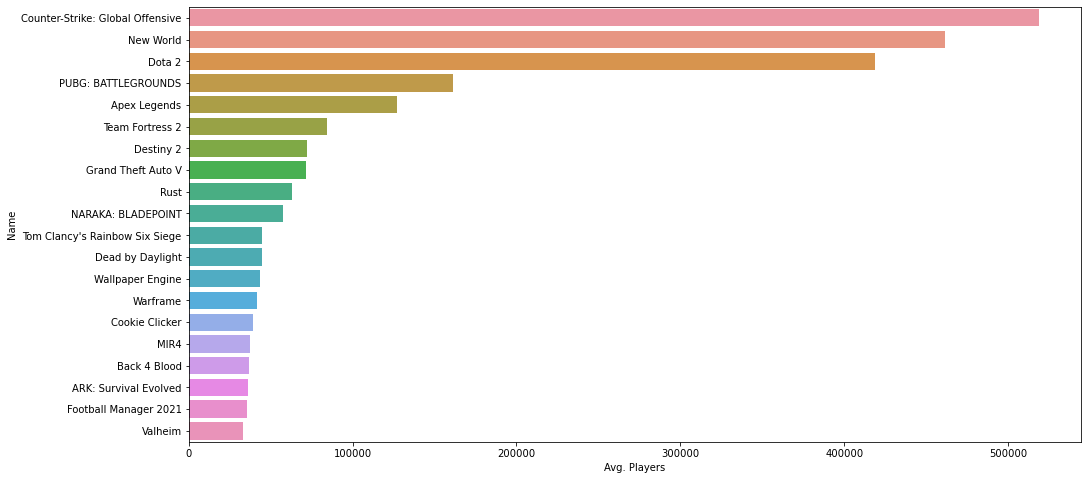

In [11]:
#Exploring data range for Avg. Players
avg_recent = pd.DataFrame(Top_20_recent[["Avg. Players", "Name"]])

#Using Bar graph
f = plt.figure(figsize=(16, 8))
sb.barplot(x="Avg. Players", y="Name", data=avg_recent)

From the most recent month, we can again see that there seems to be a huge disparity between games. However, this disparity has shrunk and the top average players also has dipped. The top three games have a clear lead from the rest of the games and there also also some familiar faces from the top 20 games of all time.

In [12]:
# Top 20 from the most dated month July 2012
Top_20_dated = steam_data_clean.loc[steam_data_clean['Month'] == '2012-07-01']
Top_20_dated = Top_20_dated.sort_values('Avg. Players', ascending=False)

#Only keep the Highest occurence
Top_20_dated = Top_20_dated.drop_duplicates(subset=['Name'], keep='first').head(20)
Top_20_dated

,Name,Month,Avg. Players,Gain,% Gain,Peak Players
3121,Dota 2,2012-07-01,52721.05,0,0,75041
2567,Team Fortress 2,2012-07-01,45566.90,0,0,62321
111,Counter-Strike,2012-07-01,34139.20,0,0,53967
124607,Football Manager 2012,2012-07-01,30730.75,0,0,60437
1448,Counter-Strike: Source,2012-07-01,27969.52,0,0,47909
30727,Sid Meier's Civilization V,2012-07-01,27448.46,0,0,50756
125931,The Elder Scrolls V: Skyrim,2012-07-01,24254.09,0,0,39658
101476,Call of Duty: Modern Warfare 3 - Multiplayer,2012-07-01,18726.93,0,0,36521
3009,Left 4 Dead 2,2012-07-01,12228.47,0,0,21811
135618,Terraria,2012-07-01,9022.77,0,0,16097


<AxesSubplot:xlabel='Avg. Players', ylabel='Name'>

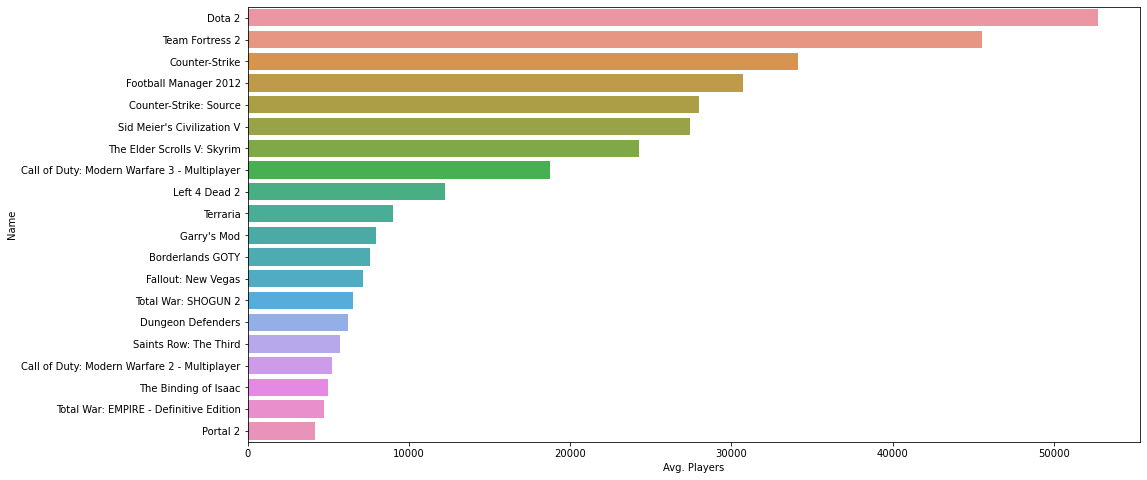

In [13]:
#Exploring data range for Avg. Players
avg_dated = pd.DataFrame(Top_20_dated[["Avg. Players", "Name"]])

#Using Bar graph
f = plt.figure(figsize=(16, 8))
sb.barplot(x="Avg. Players", y="Name", data=avg_dated)

ANALYSIS

In [14]:
# Top 20 from the month between recent and dated March 2017
Top_20_middle = steam_data_clean.loc[steam_data_clean['Month'] == '2017-03-01']
Top_20_middle = Top_20_middle.sort_values('Avg. Players', ascending=False)

#Only keep the Highest occurence
Top_20_middle = Top_20_middle.drop_duplicates(subset=['Name'], keep='first').head(20)
Top_20_middle

,Name,Month,Avg. Players,Gain,% Gain,Peak Players
3065,Dota 2,2017-03-01,548435.44,-43131.81,-7.29,956232
3401,Counter-Strike: Global Offensive,2017-03-01,386908.72,-15476.99,-3.85,742356
482364,Z1 Battle Royale,2017-03-01,62621.01,20656.87,49.23,123838
2511,Team Fortress 2,2017-03-01,49483.19,-2304.17,-4.45,74656
258804,Grand Theft Auto V,2017-03-01,48616.89,-4654.1,-8.74,98798
366122,ARK: Survival Evolved,2017-03-01,41052.97,-12081.74,-22.74,75022
529180,Football Manager 2017,2017-03-01,34001.59,-1073.52,-3.06,62590
229542,Rocket League,2017-03-01,33763.69,498.45,1.50,74330
228863,Rust,2017-03-01,32438.98,-3964.56,-10.89,66194
192381,Warframe,2017-03-01,30723.66,2325.41,8.19,69526


<AxesSubplot:xlabel='Avg. Players', ylabel='Name'>

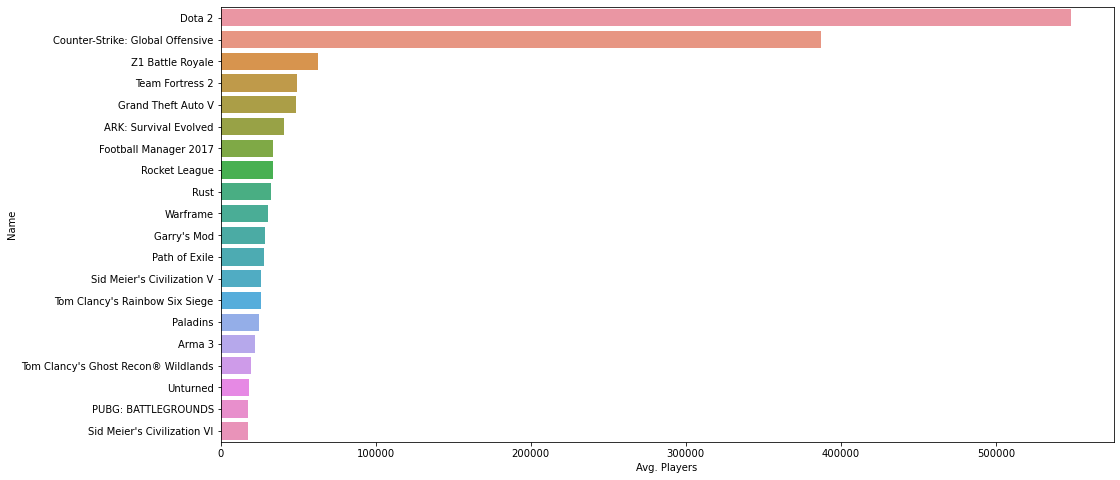

In [15]:
#Exploring data range for Avg. Players
avg_middle = pd.DataFrame(Top_20_middle[["Avg. Players", "Name"]])

#Using Bar graph
f = plt.figure(figsize=(16, 8))
sb.barplot(x="Avg. Players", y="Name", data=avg_middle)

ANALYSIS

<AxesSubplot:xlabel='Avg. Players', ylabel='Name'>

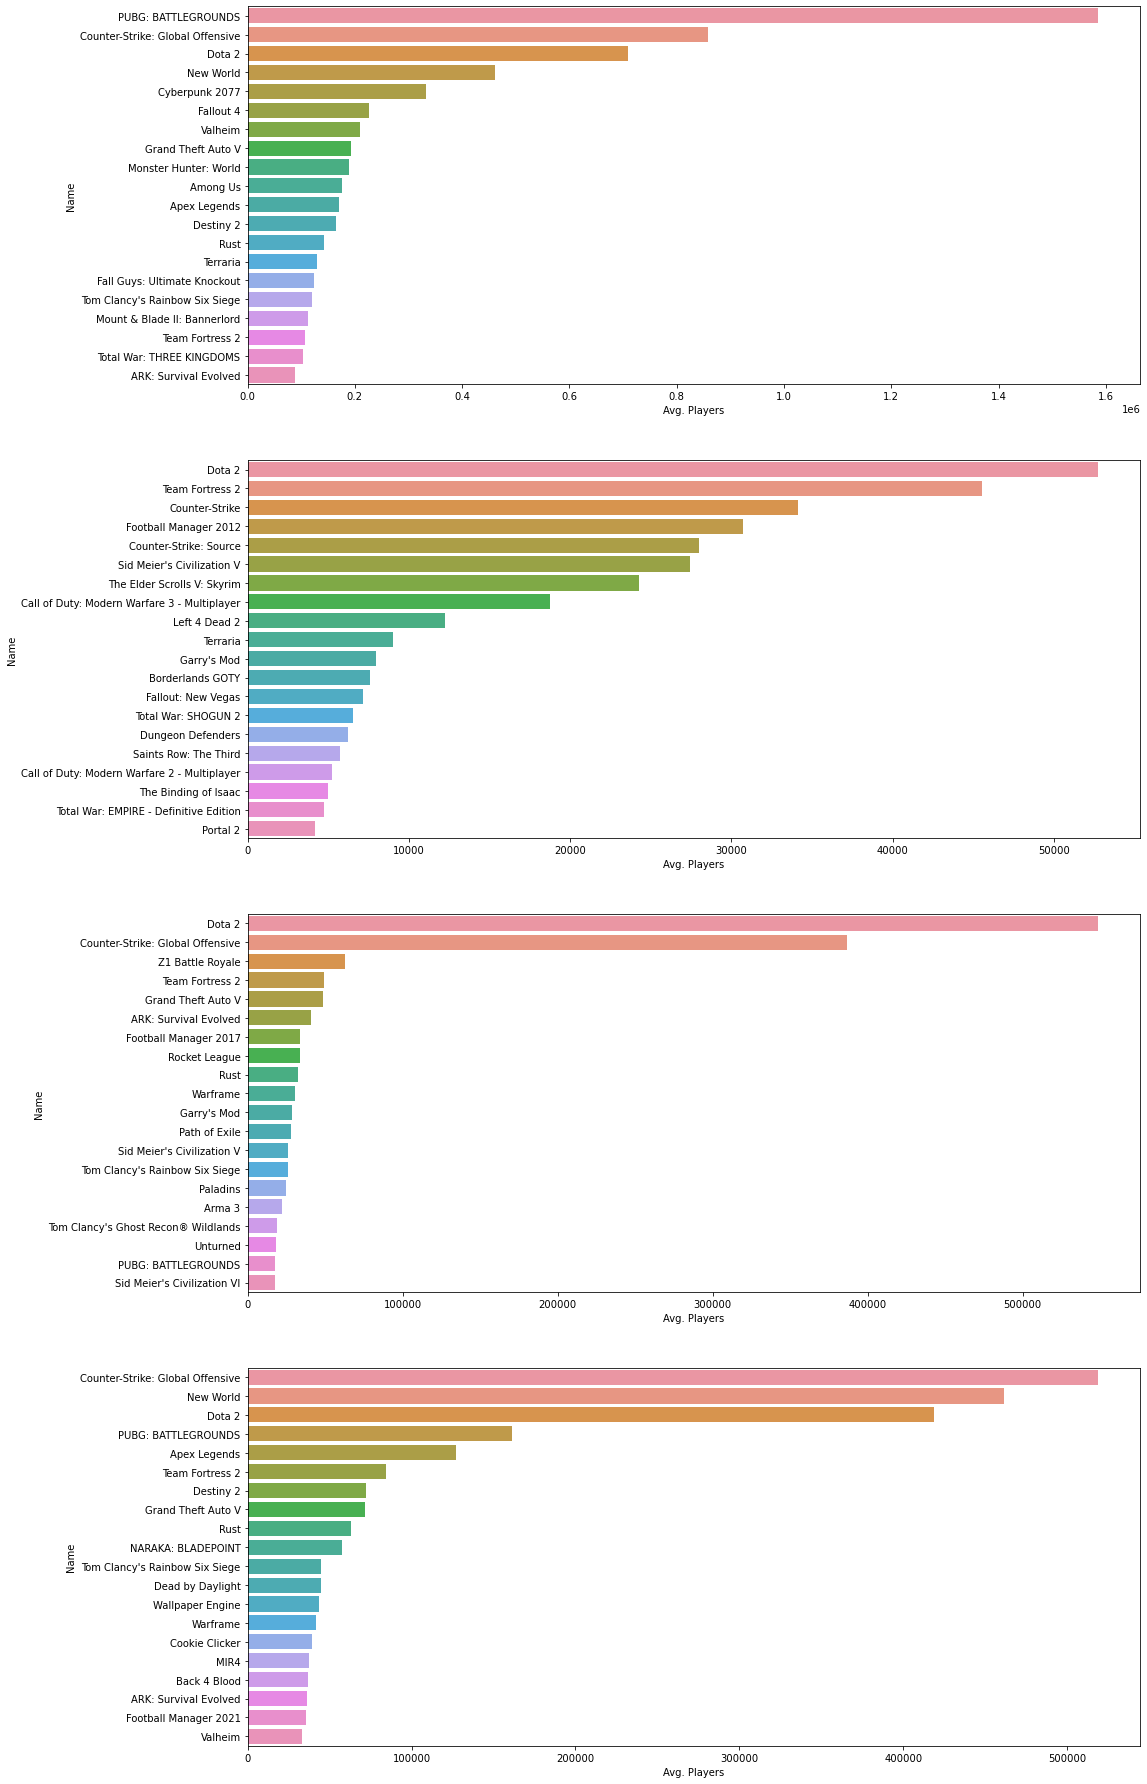

In [16]:
f, axes = plt.subplots(4,1, figsize=(16, 32))

sb.barplot(x="Avg. Players", y="Name", data=avg, orient = "h", ax = axes[0])
sb.barplot(x="Avg. Players", y="Name", data=avg_dated, orient = "h", ax = axes[1])
sb.barplot(x="Avg. Players", y="Name", data=avg_middle, orient = "h", ax = axes[2])
sb.barplot(x="Avg. Players", y="Name", data=avg_recent, orient = "h", ax = axes[3])

Analysis